In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv(r'C:\Users\PAUNESH\Documents\charging_time_and_battery_info_EV_2024.csv')

In [3]:
data.head( 20)

,Electric car model,Charging time at 240V (hours),Motor / battery information
0,2019 smart EQ fortwo (coupe),3.0,60 KW AC Synchronous
1,2019 smart EQ fortwo (convertible),3.0,60 KW AC Synchronous
2,2018 smart fortwo electric drive coupe,3.0,60 KW AC Synchronous
3,2018 smart fortwo electric drive convertible,3.0,60 KW AC Synchronous
4,2017 smart fortwo electric drive coupe,3.0,60 KW AC Synchronous
5,2017 smart fortwo electric drive convertible,3.0,60 KW AC Synchronous
6,2017 Mercedes-Benz B250e,3.5,132 kW AC Induction
7,2016 Mercedes-Benz B250e,3.5,132 kW AC Induction
8,2015 Mercedes-Benz B-Class Electric Drive,3.5,132 kW AC Induction
9,2014 Mercedes-Benz B-Class Electric Drive,3.5,132 kW AC Induction


In [4]:
data.isnull().sum()

Electric car model               0
Charging time at 240V (hours)    0
Motor / battery information      0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Electric car model             281 non-null    object 
 1   Charging time at 240V (hours)  281 non-null    float64
 2   Motor / battery information    281 non-null    object 
dtypes: float64(1), object(2)
memory usage: 6.7+ KB


In [6]:
data.describe()

,Charging time at 240V (hours)
count,281.000000
mean,8.952313
std,3.282541
min,3.000000
25%,6.000000
50%,10.000000
75%,12.000000
max,15.300000


In [7]:
# The 'Motor/ battery information' column may contain text like battery size, power, or efficiency.
# Here is how to extract useful information.

In [8]:
print(data['Motor / battery information'].head())

0    60 KW AC Synchronous
1    60 KW AC Synchronous
2    60 KW AC Synchronous
3    60 KW AC Synchronous
4    60 KW AC Synchronous
Name: Motor / battery information, dtype: object


In [9]:
# Use regular expression to extract numbers from the text.
import re

# Extracting battery capacity (khw) and motot power (kw).
def extract_battery_info(info):
    battery_capacity=re.search(r'(\d+\.?\d*)\s*(?:kWh|kW-hr|KWH|kwh)',str(info))
    motor_power=re.search(r'(\d+\.?\d*)\s*(?:kW|KW|kw)',str(info), re.IGNORECASE)
    return pd.Series({
       'Motor_power (kw)' : float(battery_capacity.group(1)) if
    battery_capacity else None,
        'battery_capacity (kwh)': float(motor_power.group(1)) if
    motor_power else None
    })

battery_info = data['Motor / battery information'].apply(extract_battery_info)

In [10]:
battery_info.head(20)

,Motor_power (kw),battery_capacity (kwh)
0,NaN,60.0
1,NaN,60.0
2,NaN,60.0
3,NaN,60.0
4,NaN,60.0
5,NaN,60.0
6,NaN,132.0
7,NaN,132.0
8,NaN,132.0
9,NaN,132.0


In [11]:
# Add the new features to the DataFrame
data=pd.concat([data,battery_info], axis=1)

In [12]:
data

,Electric car model,Charging time at 240V (hours),Motor / battery information,Motor_power (kw),battery_capacity (kwh)
0,2019 smart EQ fortwo (coupe),3.0,60 KW AC Synchronous,NaN,60.0
1,2019 smart EQ fortwo (convertible),3.0,60 KW AC Synchronous,NaN,60.0
2,2018 smart fortwo electric drive coupe,3.0,60 KW AC Synchronous,NaN,60.0
3,2018 smart fortwo electric drive convertible,3.0,60 KW AC Synchronous,NaN,60.0
4,2017 smart fortwo electric drive coupe,3.0,60 KW AC Synchronous,NaN,60.0
...,...,...,...,...,...
276,2021 Tesla Model S Long Range,15.0,179 and 186 kW AC 3-Phase,NaN,186.0
277,2022 Tesla Model S Plaid (21in Wheels),15.0,250 and 250 kW AC 3-Phase,NaN,250.0
278,2022 Tesla Model S Plaid (19in Wheels),15.0,250 and 250 kW AC 3-Phase,NaN,250.0
279,2022 Tesla Model S,15.0,247 and 247 kW AC 3-Phase,NaN,247.0


In [13]:
data=data.drop(columns=['Motor_power (kw)'])

In [14]:
# So here we getting high performance-oriented random E-Vahicles.
low=200
high=250
random_values=np.random.uniform(low, high, size=281)

In [15]:
random_values_round=np.round(random_values).astype(int)

In [16]:
df_existing=pd.DataFrame({
    'Motor_power (kW)':random_values_round
})

In [17]:
data=pd.concat([data,df_existing],axis=1)

In [18]:
#plot the disrtibution
import matplotlib.pyplot as plt
import seaborn as sns

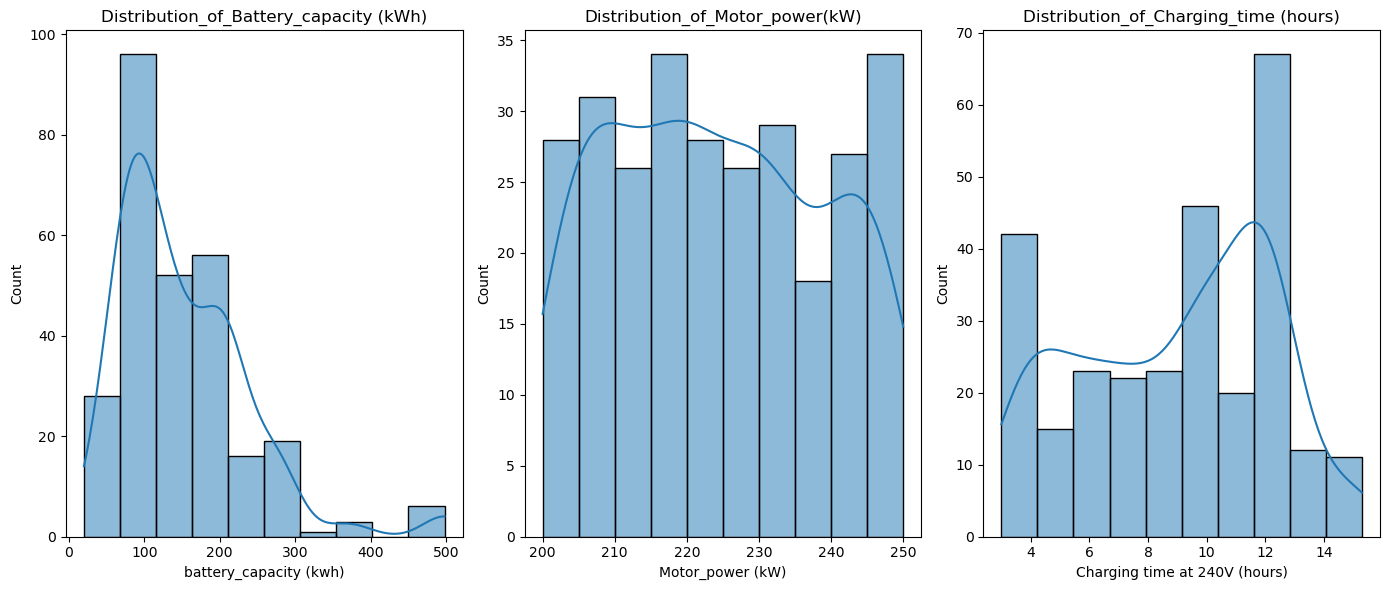

In [28]:
plt.figure(figsize=(14,6))
# plot distribution of battery capacity, motor power, and charging time.
plt.subplot(1,3,1)
sns.histplot(data['battery_capacity (kwh)'],kde=True, bins=10)
plt.title('Distribution_of_Battery_capacity (kWh)')

plt.subplot(1,3,2)
sns.histplot(data['Motor_power (kW)'],kde=True, bins=10)
plt.title('Distribution_of_Motor_power(kW)')

plt.subplot(1,3,3)
sns.histplot(data['Charging time at 240V (hours)'],kde=True, bins=10)
plt.title('Distribution_of_Charging_time (hours)')

plt.tight_layout()
plt.show()

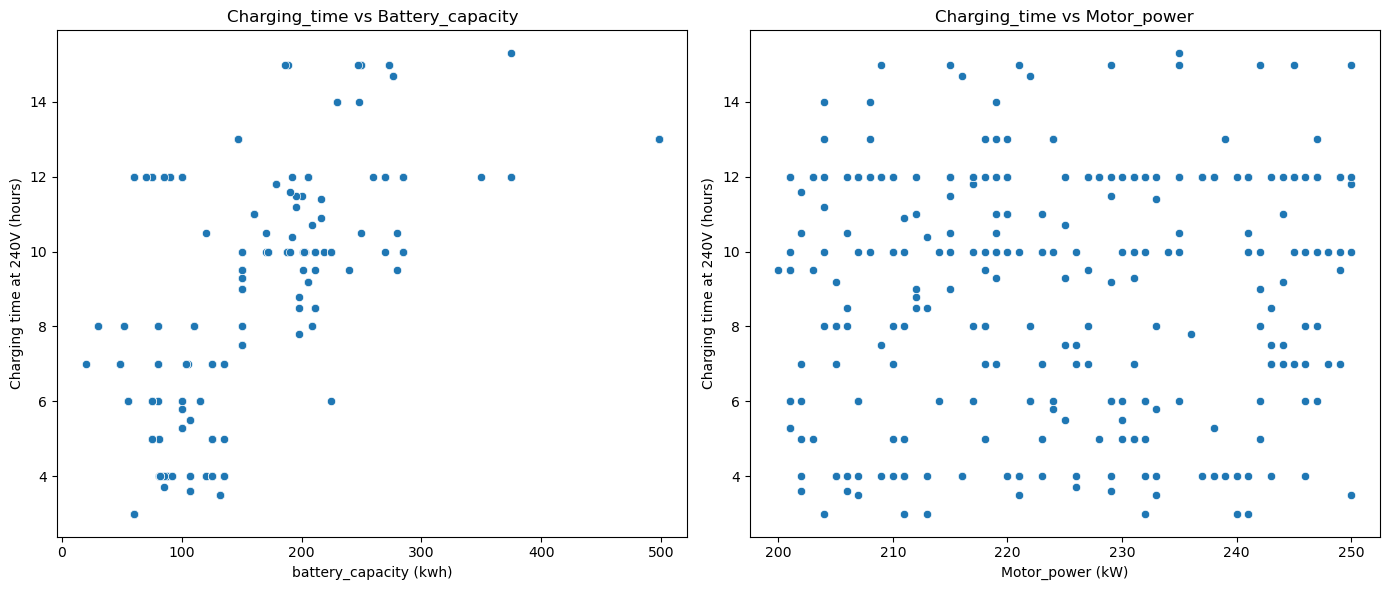

In [36]:
# scatterplot of charging time va battery capacity
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.scatterplot(x='battery_capacity (kwh)',y='Charging time at 240V (hours)',data=data)
plt.title('Charging_time vs Battery_capacity')

plt.subplot(1,2,2)
sns.scatterplot(x='Motor_power (kW)',y='Charging time at 240V (hours)',data=data)
plt.title('Charging_time vs Motor_power')
plt.tight_layout()
plt.show()

In [50]:
# Convert "EV car model" column into numerical using label encoding.
from sklearn.preprocessing import LabelEncoder

In [51]:
# Thete is 4 null values in battery capaity column
data.fillna(value='Unknown',inplace=True)

C:\Users\PAUNESH\AppData\Local\Temp\ipykernel_1136\2559805469.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.fillna(value='Unknown',inplace=True)


In [52]:
le=LabelEncoder()
data['Electric car model']=le.fit_transform(data['Electric car model'])

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#from sklearn.ensemble import RandomForestRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [70]:
data['battery_capacity (kwh)']=data['battery_capacity (kwh)'].replace('Unknown',np.nan)
data['battery_capacity (kwh)']=pd.to_numeric(data['battery_capacity (kwh)'])

In [71]:
data['battery_capacity (kwh)']=data['battery_capacity (kwh)'].fillna(data['battery_capacity (kwh)'].mean())

In [72]:
x=data[['battery_capacity (kwh)','Motor_power (kW)']] # Features
y=data['Charging time at 240V (hours)'] # target

In [73]:
#Split Data to Train and Test
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [80]:
# initialize the LinearRegression Model
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [81]:
y_pred_lr=lr.predict(x_test)

In [85]:
# Evaluate the model
lr_mae=mean_absolute_error(y_test,y_pred_lr)
lr_rmse=np.sqrt(mean_absolute_error(y_test,y_pred_lr))

In [88]:
print(f"Linear Regression - MAE: {lr_mae}, RMSE;{lr_rmse}")

Linear Regression - MAE: 2.4863912534008303, RMSE;1.5768294940800767


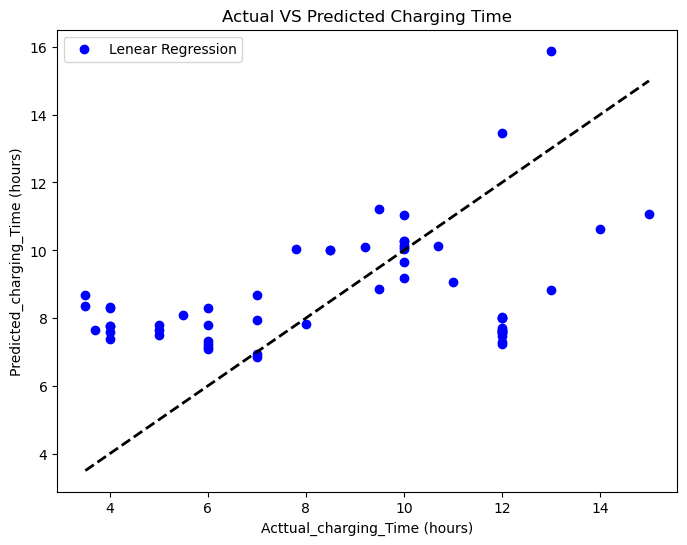

In [97]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lr, color='blue', label='Lenear Regression')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], 'k--',lw=2)
plt.xlabel('Acttual_charging_Time (hours)')
plt.ylabel('Predicted_charging_Time (hours)')
plt.title('Actual VS Predicted Charging Time')
plt.legend()
plt.show()